In [2]:
library(ape)
library(ggtree)
library(phytools)
library(phangorn)


Bioconductor version '3.10' is out-of-date; the current release version '3.13'
  is available with R version '4.1'; see https://bioconductor.org/install

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.0.4  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi: 10.1093/molbev/msy194
- Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628




Attaching package: 'ggtree'


The following object is masked from 'package:ape':

    rotate


Loading

In [3]:
tree = read.tree('../../QC/step3_phyloCheck/HBV_ALLgeno_nodup05_fasttree.nwk')
#p = readRDS('../../QC/step3_phyloCheck/HBV_ALLgeno_nodup05_ggplot.rds')
genotypes = unlist(lapply(tree$tip.label, function(x){
    return(strsplit(x, '_')[[1]][2])
}))
data = data.frame(node = 1:length(tree$tip.label), genotype = genotypes)
table(data$genotype)



   A    B    C    D    E    F    G    H 
 453 1073 1674  841  261  136    9   18 

In [65]:
p = ggtree(tree, layout = 'unrooted')


"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.0724860020577423

Average angle change [2] 0.208867959633688

Average angle change [3] 0.302911783005781

Average angle change [4] 0.419203410284584

Average angle change [5] 0.394705265465254



In [53]:
'AB048705_B' %in% tree$tip.label

[1] TRUE

In [59]:
which(tree$tip.label == 'AB048705_B')

[1] 782

In [60]:
which(tree$edge[,2] %in% c(782))

[1] 1581

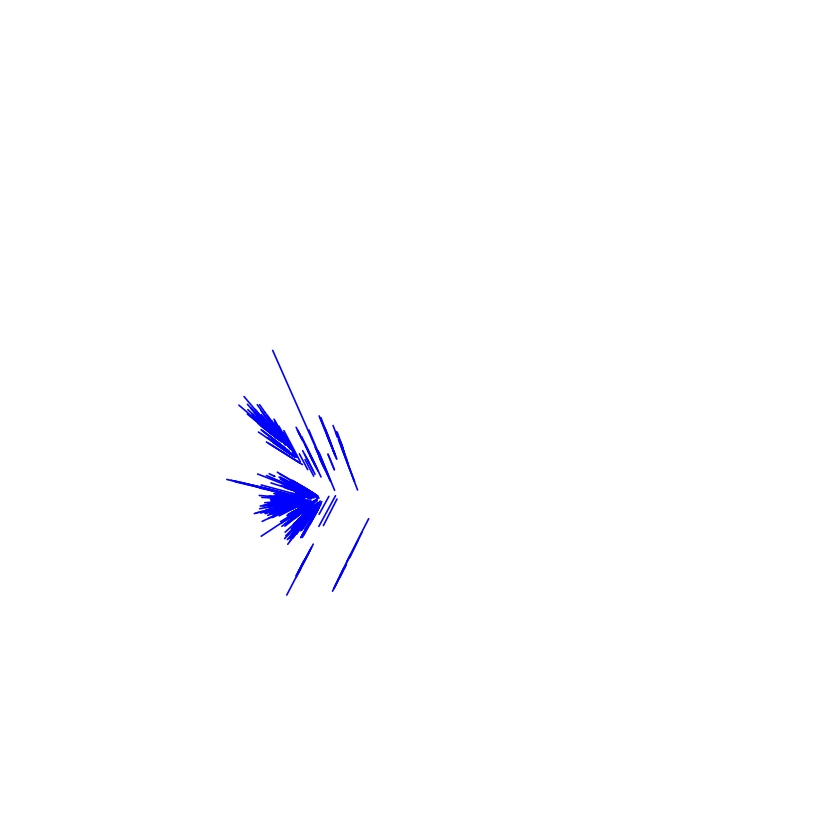

In [8]:
# genotype A
colors = rep(NA, length(tree$tip.label)+tree$Nnode)
color_node = which(genotypes == 'C')
colors[which(tree$edge[,2] %in% color_node)] = 'blue'
plot.phylo(tree, show.tip.label = F, type = 'unrooted', edge.color = colors)


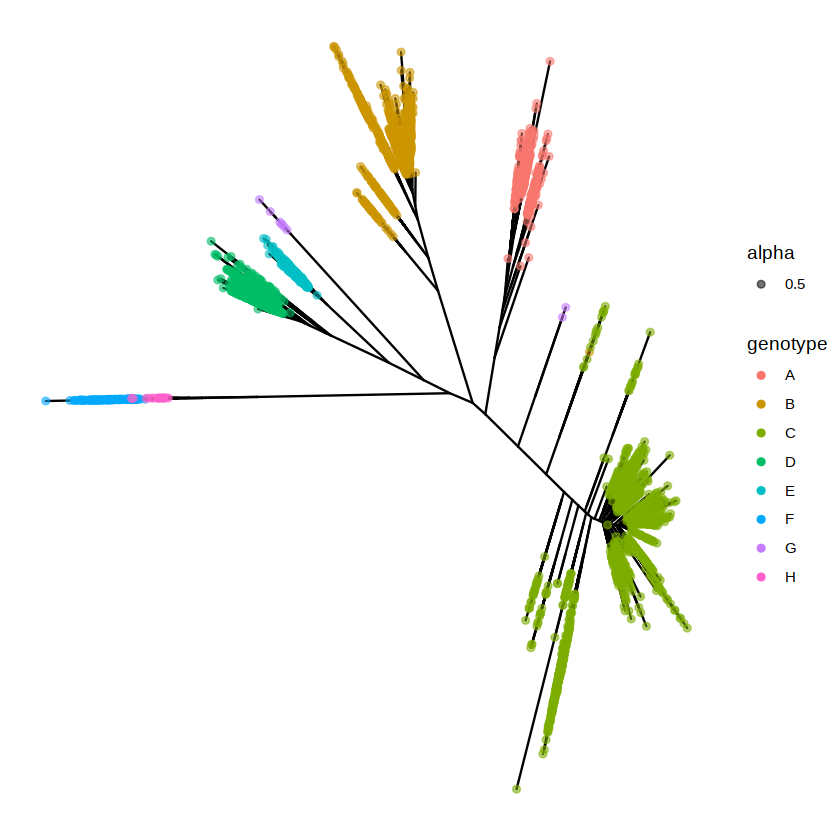

In [35]:
p %<+% data + geom_tippoint(aes(color = genotype, alpha = 0.5))

In [9]:
saveRDS(p, file = '~/hbv_covar3/QC/step3_phyloCheck/HBV_ALLgeno_nodup05_ggplot.rds')

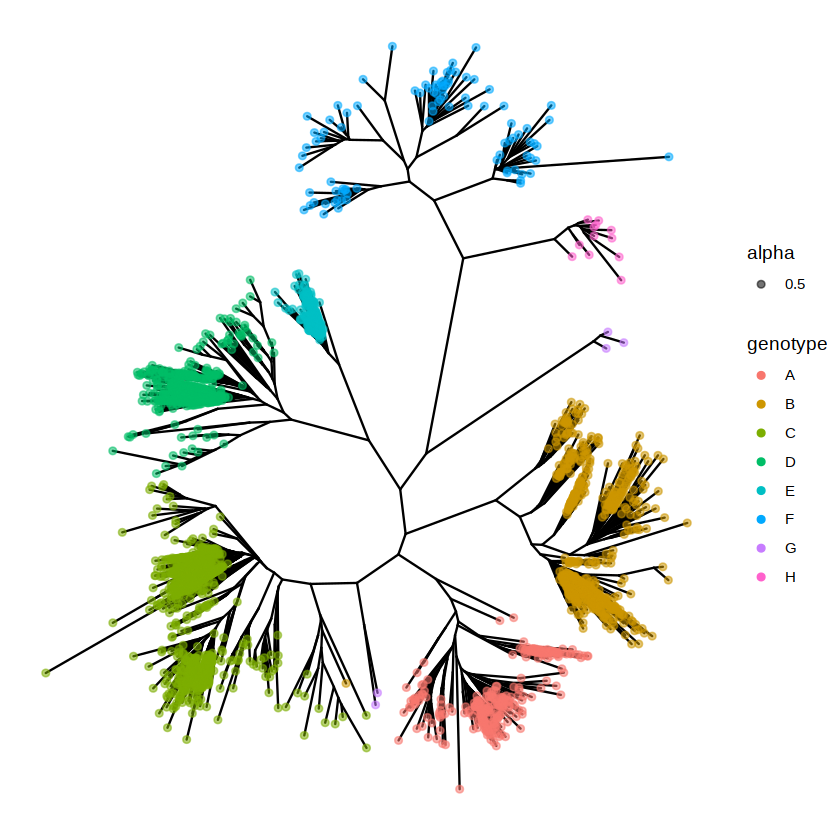

In [6]:
p %<+% data + geom_tippoint(aes(color = genotype, alpha = 0.5))

In [64]:
# the out-of-group genotype B sample was 'AB048705_B'
# the two out-of-group genotype G samples were 'FJ023674_G', 'FR714503_G'
tree$tip.label[554]
# remove AB048705_B, FJ023674_G, and FR714503_G from the alignment for downstream analysis
hbv_seqs = read.dna('../../QC/step3_phyloCheck//HBV_ALLgeno_nodup05_mafft.fasta', as.character = T, as.matrix = T, format = 'fasta')
hbv_seqs.qc = hbv_seqs[-which(rownames(hbv_seqs) %in% c('AB048705_B', 'FJ023674_G', 'FR714503_G')),]
write.dna(hbv_seqs.qc, file = '../../QC/step3_phyloCheck/HBV_ALLgeno_nodup05_mafft_phyloFilter.fasta', format = 'fasta', colsep = '')

[1] "GQ475332_C"

In [21]:
# plot the filter result
tree.drop = drop.tip(tree, c('AB048705_B', 'FJ023674_G', 'FR714503_G'))
genotypes = unlist(lapply(tree.drop$tip.label, function(x){
    return(strsplit(x, '_')[[1]][2])
}))
data = data.frame(node = 1:length(tree.drop$tip.label), genotype = genotypes)
table(data$genotype)


   A    B    C    D    E    F    G    H 
 296  745 1206  631  186   93    3   12 

In [22]:
p.drop = ggtree(tree.drop, layout = 'unrooted')

"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.0876091695268644

Average angle change [2] 0.278385920046809



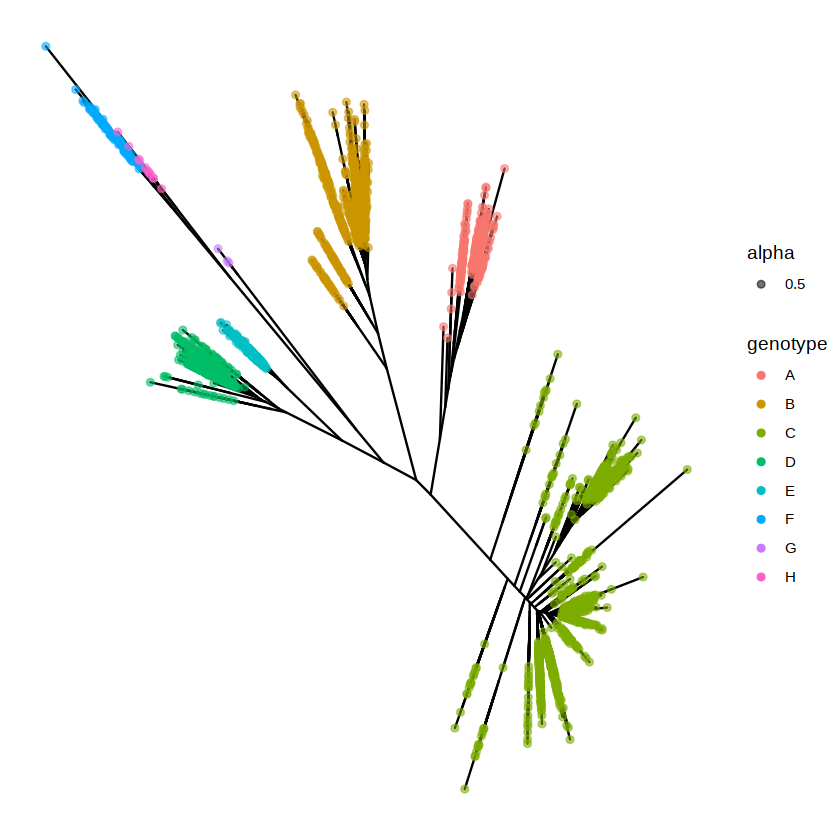

In [18]:
p.drop %<+% data + geom_tippoint(aes(color = genotype, alpha = 0.5))

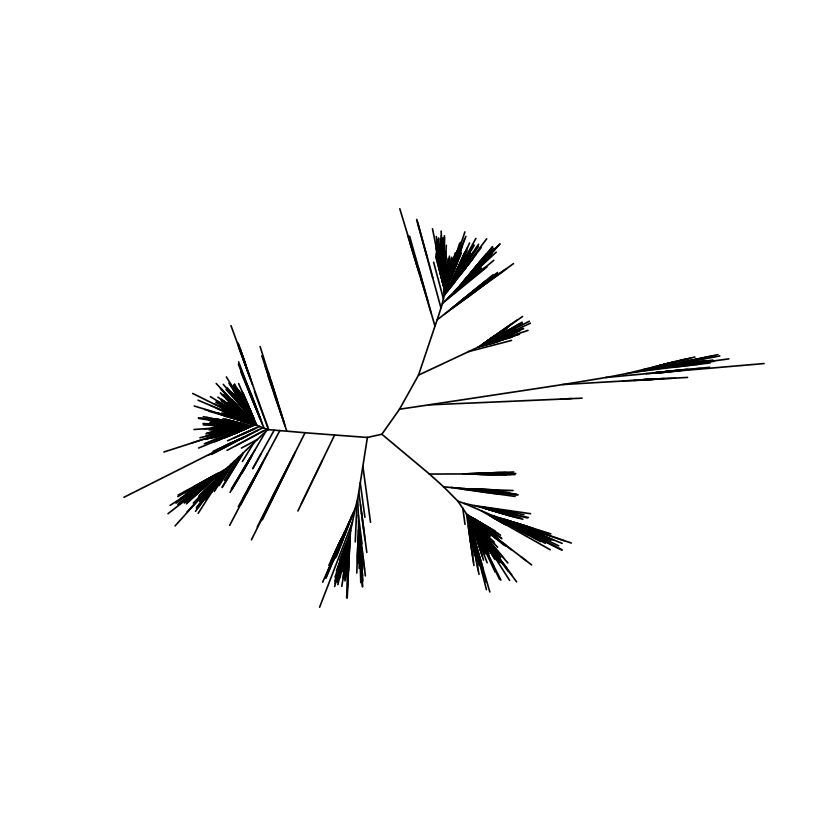

In [19]:
q = p
plot(tree, type='unrooted', show.tip.label = F)
xx = get("last_plot.phylo", envir=.PlotPhyloEnv)
q$data$y = xx$yy
q$data$x = xx$xx

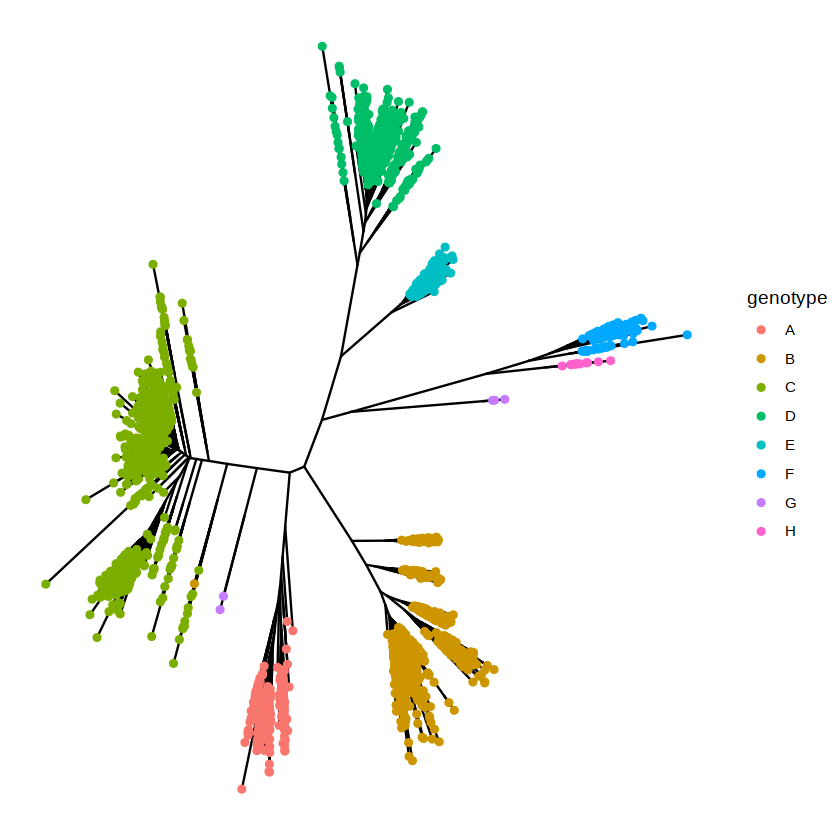

In [20]:
q = q %<+% data + geom_tippoint(aes(color = genotype))
q